1. 서울 연료별 자동차 

In [96]:
import pandas as pd
import pymysql


conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 서울시_연료별_자동차"

SeoulVehiclesFuel = pd.read_sql_query(sql,conn)
conn.close()
SeoulVehiclesFuel.head()


/tmp/ipykernel_4660/3173151173.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SeoulVehiclesFuel = pd.read_sql_query(sql,conn)


,시군구별,연료별,용도별,승용,승합,화물,특수
0,종로구,전기,비사업용,686,1,76,0
1,종로구,전기,사업용,30,12,102,0
2,중구,전기,비사업용,1008,4,610,1
3,중구,전기,사업용,465,0,64,0
4,용산구,전기,비사업용,1022,3,90,0


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


In [98]:
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

['STIXSizeTwoSym', 'cmb10', 'STIXGeneral', 'STIXGeneral', 'STIXSizeFourSym', 'cmtt10', 'STIXNonUnicode', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'cmex10', 'DejaVu Serif', 'DejaVu Sans', 'cmmi10', 'cmss10', 'cmsy10', 'STIXSizeThreeSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmr10', 'DejaVu Sans Display', 'DejaVu Serif', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXNonUnicode', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeFiveSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'FreeSans', 'Keraleeyam', 'Mallanna', 'Potti Sreeramulu', 'padmaa', 'KacstLetter', 'Rachana', 'AnjaliOldLipi', 'Liberation Serif', 'URW Bookman', 'Liberation Serif', 'Liberation Serif', 'Nimbus Sans', 'Tlwg Typist', 'Ubuntu Mono', 'Norasi', 'Noto Sans CJK JP', 'Liberation Sans Narrow', 'Noto Serif CJK JP', 'Ani', 'Lohit Telugu', 'Vemana2000', 'NATS', 'Ubuntu', 'Ubuntu', 'Gayat

In [99]:
plt.rc('font', family='NanumGothic')

In [100]:
SeoulVehiclesFuel['승용'] = SeoulVehiclesFuel['승용'].astype('float')
SeoulVehiclesFuel['승합'] = SeoulVehiclesFuel['승합'].astype('float')
SeoulVehiclesFuel['화물'] = SeoulVehiclesFuel['화물'].astype('float')
SeoulVehiclesFuel['특수'] = SeoulVehiclesFuel['특수'].astype('float')


In [101]:
SeoulVehiclesFuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    50 non-null     object 
 1   연료별     50 non-null     object 
 2   용도별     50 non-null     object 
 3   승용      50 non-null     float64
 4   승합      50 non-null     float64
 5   화물      50 non-null     float64
 6   특수      50 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


/tmp/ipykernel_4660/2712746253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_4660/2712746253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_4660/2712746253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_4660/2712746253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')


<Figure size 1200x800 with 0 Axes>

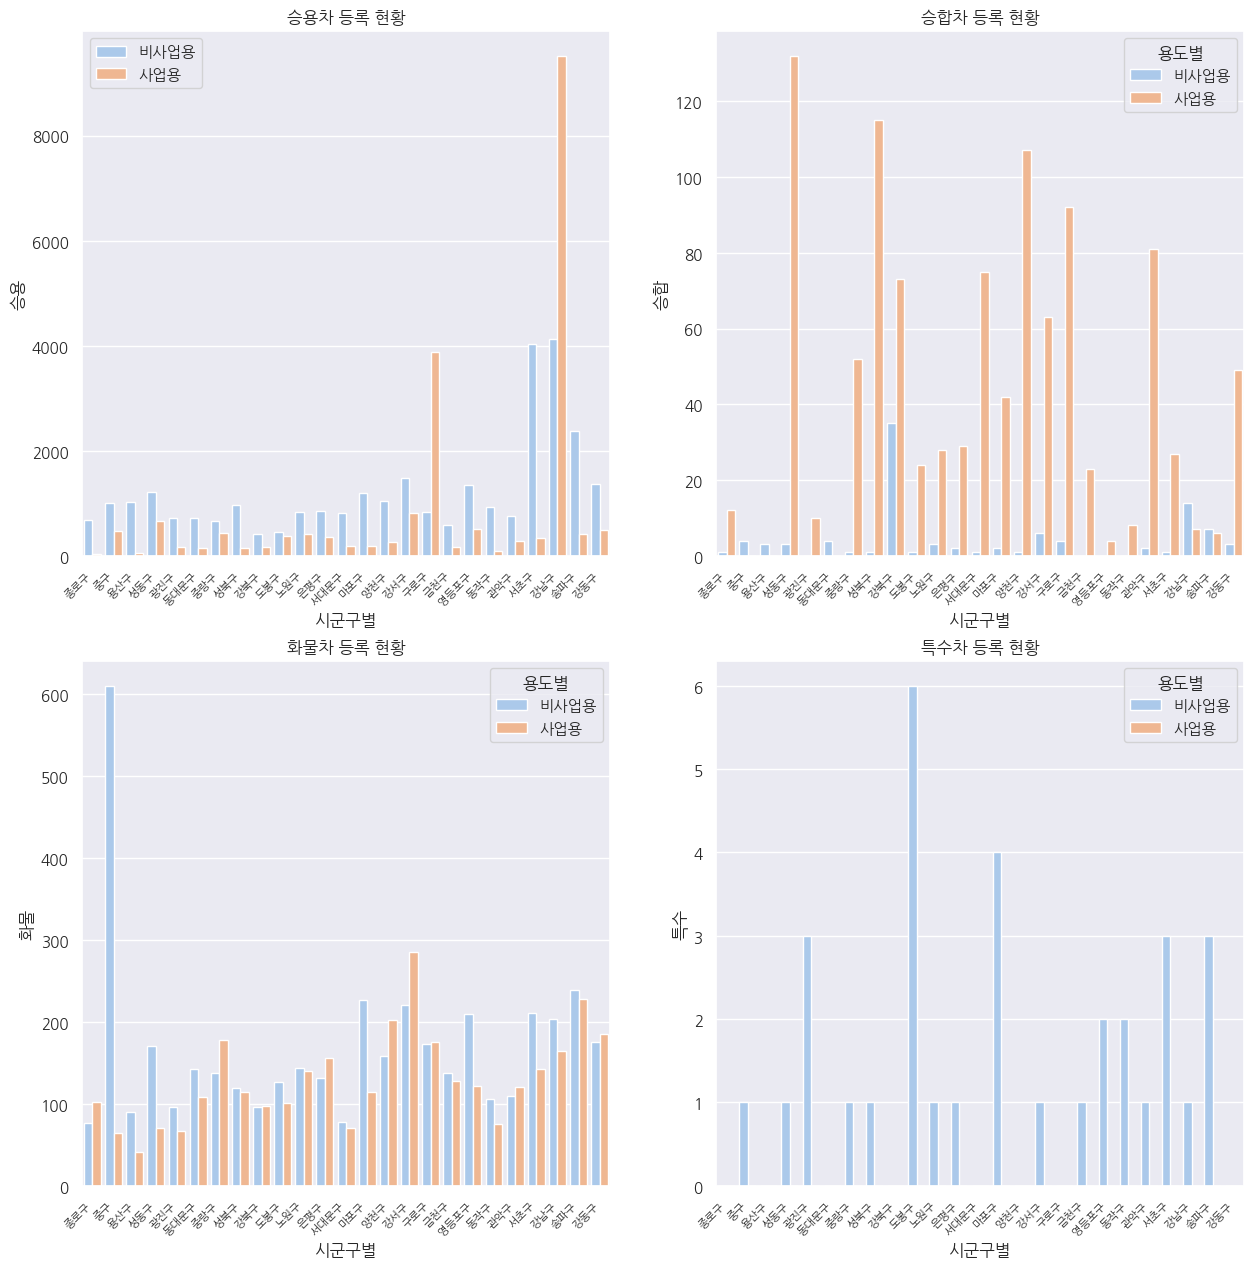

In [102]:
sns.set(color_codes=True)
sns.set_palette("pastel")
plt.rc('font', family='NanumGothic') # 한글 표시 위함 
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# '시군구별'로 승용, 승합, 화물, 특수의 막대그래프 그리기
sns.barplot(x='시군구별', y='승용', hue='용도별', data=SeoulVehiclesFuel,ax=ax[0,0])
sns.barplot(x='시군구별', y='승합', hue='용도별', data=SeoulVehiclesFuel,ax=ax[0,1])
sns.barplot(x='시군구별', y='화물', hue='용도별', data=SeoulVehiclesFuel,ax=ax[1,0])
sns.barplot(x='시군구별', y='특수', hue='용도별', data=SeoulVehiclesFuel,ax=ax[1,1])

for axes_row in ax:
    for axis in axes_row:
        axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')
        axis.tick_params(axis='x', labelsize=8)
        
ax[0,0].set_title('승용차 등록 현황')
ax[0,1].set_title('승합차 등록 현황')
ax[1,0].set_title('화물차 등록 현황')
ax[1,1].set_title('특수차 등록 현황')

ax[0,0].legend()
plt.show()


<Figure size 1500x1500 with 0 Axes>

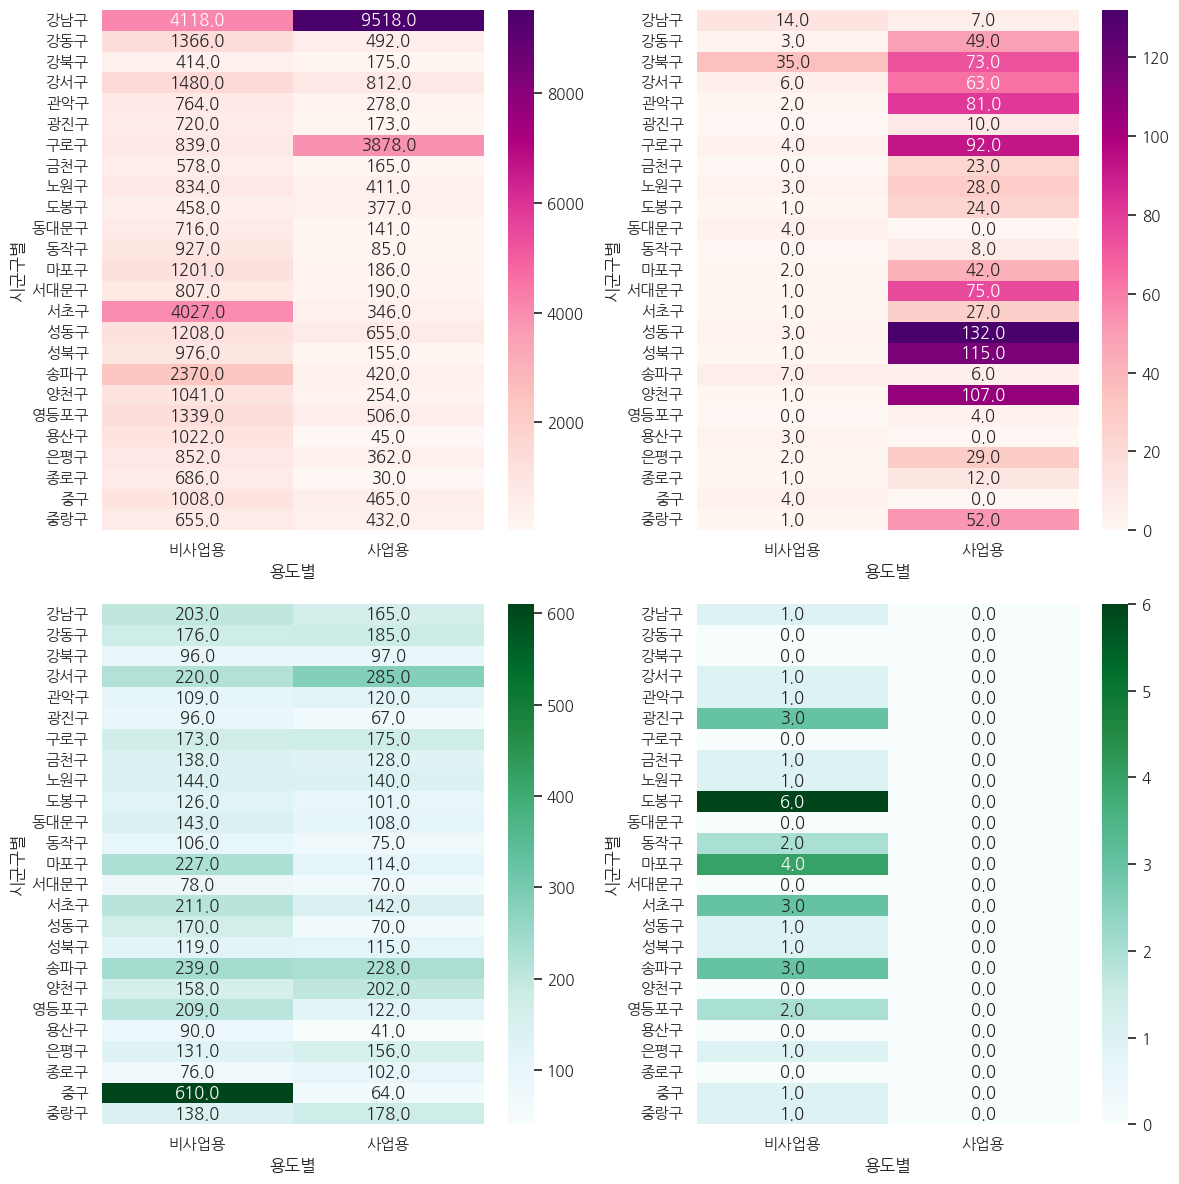

In [173]:
sns.set(color_codes=True)
sns.set_palette("pastel")
plt.rc('font', family='NanumGothic')  # 한글 표시 위함
plt.figure(figsize=(15, 15))

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

heatmap_data1 = SeoulVehiclesFuel.pivot_table(values='승용', index='시군구별', columns='용도별')
sns.heatmap(heatmap_data1, cmap='RdPu', annot=True, fmt=".1f", ax=ax[0, 0])

heatmap_data2 = SeoulVehiclesFuel.pivot_table(values='승합', index='시군구별', columns='용도별')
sns.heatmap(heatmap_data2, cmap='RdPu', annot=True, fmt=".1f", ax=ax[0, 1])

heatmap_data3 = SeoulVehiclesFuel.pivot_table(values='화물', index='시군구별', columns='용도별')
sns.heatmap(heatmap_data3, cmap='BuGn', annot=True, fmt=".1f", ax=ax[1, 0])

heatmap_data4 = SeoulVehiclesFuel.pivot_table(values='특수', index='시군구별', columns='용도별')
sns.heatmap(heatmap_data4, cmap='BuGn', annot=True, fmt=".1f", ax=ax[1, 1])

plt.tight_layout() # 그래프 사이 간격 조절 
plt.show()


서울 충전소 설치현황 

In [104]:
import pandas as pd
import pymysql


conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 전기차_충전소_위치_연도별"

ChargingStation = pd.read_sql_query(sql,conn)
conn.close()
ChargingStation.head()


/tmp/ipykernel_4660/2797023671.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ChargingStation = pd.read_sql_query(sql,conn)


,YEAR,CITY,TOWNSHIP,ADDRESS,CHARGING_NAME,FACILITY_LARGE,FACILITY_SMALL,EMPHYSEMA,RAPIDITY,OPERATING_ORG_LARGE,OPERATING_ORG_SMALL,RAPID_CHARGING_AMOUNT,CHARGER_TYPE,USER_RESTRIC,CHARGER_ID
0,2017,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
1,2017,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
2,2017,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
3,2017,서울특별시,강서구,서울특별시 강서구 가로공원로 189,가로공원로 지하공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
4,2017,서울특별시,강서구,서울특별시 강서구 강서로5길 50,곰달래문화복지센터 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1


In [105]:
# '구' 별로 정리 - 컬럼 추가 
# 급속 충전기 합, 완속 충전기 합 

데이터 다듬기 ~

In [106]:
# 서울데이터만 뽑기, 인덱스 초기화, 재정렬
SeoulChargingStation=ChargingStation[ChargingStation['CITY']=='서울특별시']
SeoulChargingStation.reset_index(inplace=True, drop=True)
SeoulChargingStation

,YEAR,CITY,TOWNSHIP,ADDRESS,CHARGING_NAME,FACILITY_LARGE,FACILITY_SMALL,EMPHYSEMA,RAPIDITY,OPERATING_ORG_LARGE,OPERATING_ORG_SMALL,RAPID_CHARGING_AMOUNT,CHARGER_TYPE,USER_RESTRIC,CHARGER_ID
0,2017,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
1,2017,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
2,2017,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
3,2017,서울특별시,강서구,서울특별시 강서구 가로공원로 189,가로공원로 지하공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
4,2017,서울특별시,강서구,서울특별시 강서구 강서로5길 50,곰달래문화복지센터 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45376,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1
45377,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45378,2012,서울특별시,중구,서울특별시 중구 세종대로 110,서울시 신청사,공공시설,공공기관,급속,DC차데모+AC3상,지자체,지자체기타,,DC차데모+AC3상,이용자제한,1
45379,2015,서울특별시,양천구,서울특별시 양천구 중앙로 341-3,명화운수,기타시설,기타,급속,AC3상,지자체,지자체기타,,AC3상,이용자제한,1


In [107]:
# 칼럼명 수정 
SeoulChargingStation.rename(columns={'YEAR':'설치년도','CITY':'시도','TOWNSHIP':'군구','ADDRESS':'주소','YEAR':'설치년도','YEAR':'설치년도','CHARGING_NAME':'충전소명',
                                'FACILITY_LARGE':'시설구분(대)','FACILITY_SMALL':'시설구분(소)','EMPHYSEMA':'기종(대)','RAPIDITY':'기종(소)','OPERATING_ORG_LARGE':'운영기관(대)',
                                'OPERATING_ORG_SMALL':'운영기관(소)','RAPID_CHARGING_AMOUNT':'급속충전량','CHARGER_TYPE':'충전기타입','USER_RESTRIC':'이용자제한',
                                'CHARGER_ID':'충전기ID',},inplace=True)
SeoulChargingStation

/tmp/ipykernel_4660/2865429520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SeoulChargingStation.rename(columns={'YEAR':'설치년도','CITY':'시도','TOWNSHIP':'군구','ADDRESS':'주소','YEAR':'설치년도','YEAR':'설치년도','CHARGING_NAME':'충전소명',


,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID
0,2017,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
1,2017,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
2,2017,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
3,2017,서울특별시,강서구,서울특별시 강서구 가로공원로 189,가로공원로 지하공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
4,2017,서울특별시,강서구,서울특별시 강서구 강서로5길 50,곰달래문화복지센터 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45376,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1
45377,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45378,2012,서울특별시,중구,서울특별시 중구 세종대로 110,서울시 신청사,공공시설,공공기관,급속,DC차데모+AC3상,지자체,지자체기타,,DC차데모+AC3상,이용자제한,1
45379,2015,서울특별시,양천구,서울특별시 양천구 중앙로 341-3,명화운수,기타시설,기타,급속,AC3상,지자체,지자체기타,,AC3상,이용자제한,1


In [108]:
# '군구' 칼럼에서 빈 값 찾기 
empty_rows = SeoulChargingStation[SeoulChargingStation['군구'].apply(lambda x: isinstance(x, (str, bytes)) and x.strip() == '')]
empty_rows

,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID
12050,2023,서울특별시,,서울 강서구 공항대로59길 64,한사랑2차삼성아파트,공동주택시설,아파트,완속,AC완속,타기관(보조금),지에스커넥트,,AC완속,이용자제한,1
12051,2023,서울특별시,,서울 강서구 공항대로59길 64,한사랑2차삼성아파트,공동주택시설,아파트,완속,AC완속,타기관(보조금),지에스커넥트,,AC완속,이용자제한,2
12052,2023,서울특별시,,서울 강서구 공항대로59길 64,한사랑2차삼성아파트,공동주택시설,아파트,완속,AC완속,타기관(보조금),지에스커넥트,,AC완속,이용자제한,3
12053,2023,서울특별시,,서울 강서구 공항대로59길 64,한사랑2차삼성아파트,공동주택시설,아파트,완속,AC완속,타기관(보조금),지에스커넥트,,AC완속,이용자제한,4
35879,2023,서울특별시,,서울 영등포구 신길로61길 21,영등포본동 제1공영주차장,주차시설,공영주차장,완속,AC완속,타기관,서울에너지공사,,AC완속,이용가능,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45373,2023,서울특별시,,서울특별시 양천구 목동동로 437,항도드림네스트 지하주차장,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45374,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하3층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1
45375,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하3층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45376,2023,서울특별시,,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1


In [109]:
# '군구' 빈 칼럼 채우기 25개 구...
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('강남구', case=False, na=False), '군구'] = '강남구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('강동구', case=False, na=False), '군구'] = '강동구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('강북구', case=False, na=False), '군구'] = '강북구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('강서구', case=False, na=False), '군구'] = '강서구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('관악구', case=False, na=False), '군구'] = '관악구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('광진구', case=False, na=False), '군구'] = '광진구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('구로구', case=False, na=False), '군구'] = '구로구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('금천구', case=False, na=False), '군구'] = '금천구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('노원구', case=False, na=False), '군구'] = '노원구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('도봉구', case=False, na=False), '군구'] = '도봉구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('동대문구', case=False, na=False), '군구'] = '동대문구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('동작구', case=False, na=False), '군구'] = '동작구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('마포구', case=False, na=False), '군구'] = '마포구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('서대문구', case=False, na=False), '군구'] = '서대문구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('서초구', case=False, na=False), '군구'] = '서초구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('성동구', case=False, na=False), '군구'] = '성동구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('성북구', case=False, na=False), '군구'] = '성북구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('송파구', case=False, na=False), '군구'] = '송파구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('양천구', case=False, na=False), '군구'] = '양천구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('영등포구', case=False, na=False), '군구'] = '영등포구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('용산구', case=False, na=False), '군구'] = '용산구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('은평구', case=False, na=False), '군구'] = '은평구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('종로구', case=False, na=False), '군구'] = '종로구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('중구', case=False, na=False), '군구'] = '중구'
SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('중랑구', case=False, na=False), '군구'] = '중랑구'




/tmp/ipykernel_4660/837519281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('강남구', case=False, na=False), '군구'] = '강남구'
/tmp/ipykernel_4660/837519281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SeoulChargingStation.loc[SeoulChargingStation['주소'].str.contains('강동구', case=False, na=False), '군구'] = '강동구'
/tmp/ipykernel_4660/837519281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [110]:
# '군구' 칼럼에서 빈 값 찾기 -> 다 채워짐
empty_rows = SeoulChargingStation[SeoulChargingStation['군구'].apply(lambda x: isinstance(x, (str, bytes)) and x.strip() == '')]
empty_rows

,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID


In [111]:
# 시설구분(대)도 비어있는지 확인 
empty_rows = SeoulChargingStation[SeoulChargingStation['시설구분(대)'].apply(lambda x: isinstance(x, (str, bytes)) and x.strip() == '')]
empty_rows

,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID
45296,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,급속,DC콤보,타기관,한화솔루션,,DC콤보,이용가능,1
45297,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,급속,DC콤보,타기관,한화솔루션,,DC콤보,이용가능,2
45298,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,3
45299,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,4
45300,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,5
45301,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,6
45302,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,7
45303,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,8
45304,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,9
45305,2023,서울특별시,광진구,서울특별시 광진구 광나루로 458,이편한세상광진그랜드파크,,기타,완속,AC완속,타기관,한화솔루션,,AC완속,이용가능,10


In [112]:
SeoulChargingStation.loc[SeoulChargingStation['시설구분(소)'].str.contains('기타', case=False, na=False), '시설구분(대)'] = '기타시설'


/tmp/ipykernel_4660/3653332516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SeoulChargingStation.loc[SeoulChargingStation['시설구분(소)'].str.contains('기타', case=False, na=False), '시설구분(대)'] = '기타시설'


In [113]:
# 채워졌는지 확인
empty_rows = SeoulChargingStation[SeoulChargingStation['시설구분(대)'].apply(lambda x: isinstance(x, (str, bytes)) and x.strip() == '')]
empty_rows

,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID


In [114]:
SeoulChargingStation.tail(10)

,설치년도,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID
45371,2023,서울특별시,양천구,서울특별시 양천구 남부순환로85길 16,대주파크빌,공동주택시설,아파트,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,4
45372,2023,서울특별시,양천구,서울특별시 양천구 목동동로 437,항도드림네스트 지하주차장,기타시설,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1
45373,2023,서울특별시,양천구,서울특별시 양천구 목동동로 437,항도드림네스트 지하주차장,기타시설,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45374,2023,서울특별시,영등포구,서울특별시 영등포구 은행로 25,안원빌딩 지하3층,기타시설,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1
45375,2023,서울특별시,영등포구,서울특별시 영등포구 은행로 25,안원빌딩 지하3층,기타시설,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45376,2023,서울특별시,영등포구,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,기타시설,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,1
45377,2023,서울특별시,영등포구,서울특별시 영등포구 은행로 25,안원빌딩 지하2층,기타시설,기타,완속,AC완속,타기관(보조금),한화솔루션,,AC완속,이용가능,2
45378,2012,서울특별시,중구,서울특별시 중구 세종대로 110,서울시 신청사,공공시설,공공기관,급속,DC차데모+AC3상,지자체,지자체기타,,DC차데모+AC3상,이용자제한,1
45379,2015,서울특별시,양천구,서울특별시 양천구 중앙로 341-3,명화운수,기타시설,기타,급속,AC3상,지자체,지자체기타,,AC3상,이용자제한,1
45380,2015,서울특별시,성동구,서울특별시 성동구 서울숲길 41,대한상운,기타시설,기타,급속,AC3상,지자체,지자체기타,,AC3상,이용자제한,1


In [115]:
SeoulChargingStation.to_csv('../data/SeoulChargingStation.csv',sep=',',encoding='utf-8')

~ 데이터 다듬기

In [116]:
SeoulChargingStation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45381 entries, 0 to 45380
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   설치년도     45381 non-null  object
 1   시도       45381 non-null  object
 2   군구       45381 non-null  object
 3   주소       45381 non-null  object
 4   충전소명     45381 non-null  object
 5   시설구분(대)  45381 non-null  object
 6   시설구분(소)  45381 non-null  object
 7   기종(대)    45381 non-null  object
 8   기종(소)    45381 non-null  object
 9   운영기관(대)  45381 non-null  object
 10  운영기관(소)  45381 non-null  object
 11  급속충전량    45381 non-null  object
 12  충전기타입    45381 non-null  object
 13  이용자제한    45381 non-null  object
 14  충전기ID    45381 non-null  object
dtypes: object(15)
memory usage: 5.2+ MB


충전소 설치 수 

In [117]:
import pandas as pd


df = pd.DataFrame(SeoulChargingStation)

# '설치년도'별 '군구'별 충전소 설치 수 
count = df.groupby(['설치년도', '군구']).size().reset_index(name='충전소갯수')
count


,설치년도,군구,충전소갯수
0,2012,노원구,3
1,2012,서초구,2
2,2012,영등포구,1
3,2012,중구,1
4,2012,중랑구,2
...,...,...,...
203,2023,용산구,527
204,2023,은평구,551
205,2023,종로구,175
206,2023,중구,309


In [118]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   설치년도    208 non-null    object
 1   군구      208 non-null    object
 2   충전소갯수   208 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


In [119]:

df = pd.DataFrame(count)

# '군구'에 따른 충전소 설치 수 
count_by_gungu = df.groupby('군구')['충전소갯수'].sum().reset_index(name='충전소갯수')

count_by_gungu


,군구,충전소갯수
0,강남구,3613
1,강동구,1709
2,강북구,835
3,강서구,2604
4,관악구,963
5,광진구,851
6,구로구,2177
7,금천구,1414
8,노원구,2012
9,도봉구,1049


In [120]:
SeoulVehiclesFuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    50 non-null     object 
 1   연료별     50 non-null     object 
 2   용도별     50 non-null     object 
 3   승용      50 non-null     float64
 4   승합      50 non-null     float64
 5   화물      50 non-null     float64
 6   특수      50 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [121]:
# 1번에서 사용했던 데이터 불러와서 구 마다 전기차 등록대수 계산 

import pandas as pd
df=[]
df = pd.DataFrame(SeoulVehiclesFuel)

# '승용', '승합', '화물', '특수'의 합을 계산하고 새로운 열 '총합' 추가
df['총합'] = df[['승용', '승합', '화물', '특수']].sum(axis=1)
df.head()


,시군구별,연료별,용도별,승용,승합,화물,특수,총합
0,종로구,전기,비사업용,686.0,1.0,76.0,0.0,763.0
1,종로구,전기,사업용,30.0,12.0,102.0,0.0,144.0
2,중구,전기,비사업용,1008.0,4.0,610.0,1.0,1623.0
3,중구,전기,사업용,465.0,0.0,64.0,0.0,529.0
4,용산구,전기,비사업용,1022.0,3.0,90.0,0.0,1115.0


In [122]:
count_by_car=[]
count_by_car = df.groupby('시군구별')['총합'].sum().reset_index(name='전기차수')

count_by_car.rename(columns={'시군구별':'군구'}, inplace=True)
count_by_car

,군구,전기차수
0,강남구,14026.0
1,강동구,2271.0
2,강북구,890.0
3,강서구,2867.0
4,관악구,1355.0
5,광진구,1069.0
6,구로구,5161.0
7,금천구,1033.0
8,노원구,1561.0
9,도봉구,1093.0


In [123]:
SeoulData = pd.merge(count_by_gungu, count_by_car)
SeoulData


,군구,충전소갯수,전기차수
0,강남구,3613,14026.0
1,강동구,1709,2271.0
2,강북구,835,890.0
3,강서구,2604,2867.0
4,관악구,963,1355.0
5,광진구,851,1069.0
6,구로구,2177,5161.0
7,금천구,1414,1033.0
8,노원구,2012,1561.0
9,도봉구,1049,1093.0


In [124]:
SeoulData['충전소갯수'] = SeoulData['충전소갯수'].astype('float')
SeoulData.head()

,군구,충전소갯수,전기차수
0,강남구,3613.0,14026.0
1,강동구,1709.0,2271.0
2,강북구,835.0,890.0
3,강서구,2604.0,2867.0
4,관악구,963.0,1355.0


In [125]:
# 전기차 1대당 충전소 갯수 반올림 계산
SeoulData['비율'] = (SeoulData['전기차수'] / SeoulData['충전소갯수']).round(2)
SeoulData

,군구,충전소갯수,전기차수,비율
0,강남구,3613.0,14026.0,3.88
1,강동구,1709.0,2271.0,1.33
2,강북구,835.0,890.0,1.07
3,강서구,2604.0,2867.0,1.10
4,관악구,963.0,1355.0,1.41
5,광진구,851.0,1069.0,1.26
6,구로구,2177.0,5161.0,2.37
7,금천구,1414.0,1033.0,0.73
8,노원구,2012.0,1561.0,0.78
9,도봉구,1049.0,1093.0,1.04


In [126]:
seoul_center = pd.read_csv("../data/서울시_자치구_중심점_2017.csv",encoding = 'euc-kr')
seoul_center = seoul_center[['시군구명','X','Y']]
seoul_center

,시군구명,X,Y
0,종로구,126.977321,37.594917
1,중구,126.995968,37.560144
2,용산구,126.979907,37.531385
3,성동구,127.041059,37.551030
4,광진구,127.085744,37.546706
5,동대문구,127.054848,37.581957
6,중랑구,127.092880,37.597803
7,성북구,127.017579,37.605702
8,강북구,127.011189,37.643474
9,도봉구,127.032369,37.669102


In [127]:
seoul_center = seoul_center.sort_values(by=["시군구명"], ascending=[True]) 
seoul_center_s = seoul_center.rename(columns={"시군구명":"군구"})
seoul_center_s.reset_index(drop=True)

,군구,X,Y
0,강남구,127.062985,37.496644
1,강동구,127.147012,37.550450
2,강북구,127.011189,37.643474
3,강서구,126.822807,37.561235
4,관악구,126.945337,37.467376
5,광진구,127.085744,37.546706
6,구로구,126.856301,37.494405
7,금천구,126.900820,37.460568
8,노원구,127.075035,37.652511
9,도봉구,127.032369,37.669102


In [128]:
SeoulDataStationMean = SeoulData['충전소갯수'].mean()
SeoulDataCarMean = SeoulData['전기차수'].mean()

print("Average 충전소 갯수:", SeoulDataStationMean)
print("Average 전기차 수:", SeoulDataCarMean)

Average 충전소 갯수: 1815.24
Average 전기차 수: 2383.36


In [129]:

SeoulData['충전소갯수_비교'] = SeoulData['충전소갯수'].apply(lambda x: '많음' if x > SeoulDataStationMean else '적음')
SeoulData['전기차수_비교'] = SeoulData['전기차수'].apply(lambda x: '많음' if x > SeoulDataCarMean else '적음')
SeoulData

,군구,충전소갯수,전기차수,비율,충전소갯수_비교,전기차수_비교
0,강남구,3613.0,14026.0,3.88,많음,많음
1,강동구,1709.0,2271.0,1.33,적음,적음
2,강북구,835.0,890.0,1.07,적음,적음
3,강서구,2604.0,2867.0,1.10,많음,많음
4,관악구,963.0,1355.0,1.41,적음,적음
5,광진구,851.0,1069.0,1.26,적음,적음
6,구로구,2177.0,5161.0,2.37,많음,많음
7,금천구,1414.0,1033.0,0.73,적음,적음
8,노원구,2012.0,1561.0,0.78,많음,적음
9,도봉구,1049.0,1093.0,1.04,적음,적음


In [130]:
SeoulData = pd.merge(SeoulData, seoul_center_s)
SeoulData

,군구,충전소갯수,전기차수,비율,충전소갯수_비교,전기차수_비교,X,Y
0,강남구,3613.0,14026.0,3.88,많음,많음,127.062985,37.496644
1,강동구,1709.0,2271.0,1.33,적음,적음,127.147012,37.550450
2,강북구,835.0,890.0,1.07,적음,적음,127.011189,37.643474
3,강서구,2604.0,2867.0,1.10,많음,많음,126.822807,37.561235
4,관악구,963.0,1355.0,1.41,적음,적음,126.945337,37.467376
5,광진구,851.0,1069.0,1.26,적음,적음,127.085744,37.546706
6,구로구,2177.0,5161.0,2.37,많음,많음,126.856301,37.494405
7,금천구,1414.0,1033.0,0.73,적음,적음,126.900820,37.460568
8,노원구,2012.0,1561.0,0.78,많음,적음,127.075035,37.652511
9,도봉구,1049.0,1093.0,1.04,적음,적음,127.032369,37.669102


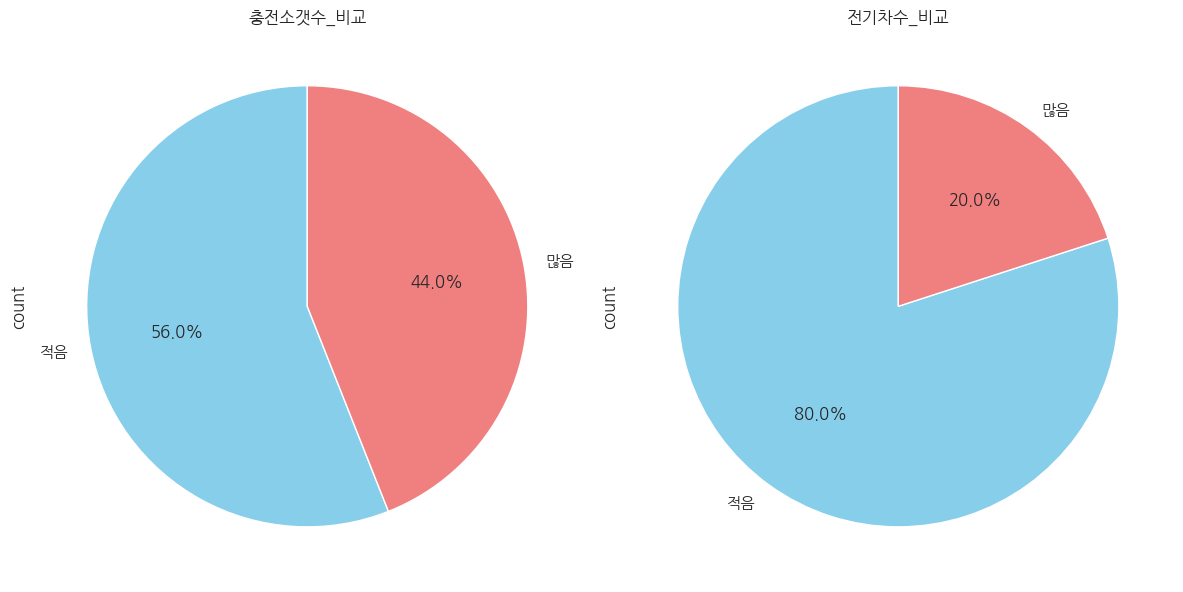

In [131]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 프레임 생성
visualization_data = SeoulData[['군구', '충전소갯수_비교', '전기차수_비교']]

# 군구별로 '충전소갯수_비교' 파이 차트
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
visualization_data['충전소갯수_비교'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('충전소갯수_비교')

# 군구별로 '전기차수_비교' 파이 차트
plt.subplot(1, 2, 2)
visualization_data['전기차수_비교'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('전기차수_비교')

plt.tight_layout()
plt.show()


In [132]:
merge_res = {}

# Use the .loc method to apply conditions row-wise
# Also, use parentheses for conditions and square brackets for dictionary key-value pairs
merge_res["둘다많음"] = SeoulData.loc[(SeoulData['충전소갯수_비교'] == '많음') & (SeoulData['전기차수_비교'] == '많음'), '군구'].tolist()
merge_res["둘다적음"] = SeoulData.loc[(SeoulData['충전소갯수_비교'] == '적음') & (SeoulData['전기차수_비교'] == '적음'), '군구'].tolist()
merge_res["차 많고 충전소 적음"] = SeoulData.loc[(SeoulData['충전소갯수_비교'] == '적음') & (SeoulData['전기차수_비교'] == '많음'), '군구'].tolist()
merge_res["충전소 많고 차 적음"] = SeoulData.loc[(SeoulData['충전소갯수_비교'] == '많음') & (SeoulData['전기차수_비교'] == '적음'), '군구'].tolist()

merge_res

{'둘다많음': ['강남구', '강서구', '구로구', '서초구', '송파구'],
 '둘다적음': ['강동구',
  '강북구',
  '관악구',
  '광진구',
  '금천구',
  '도봉구',
  '동대문구',
  '동작구',
  '서대문구',
  '양천구',
  '용산구',
  '종로구',
  '중구',
  '중랑구'],
 '차 많고 충전소 적음': [],
 '충전소 많고 차 적음': ['노원구', '마포구', '성동구', '성북구', '영등포구', '은평구']}

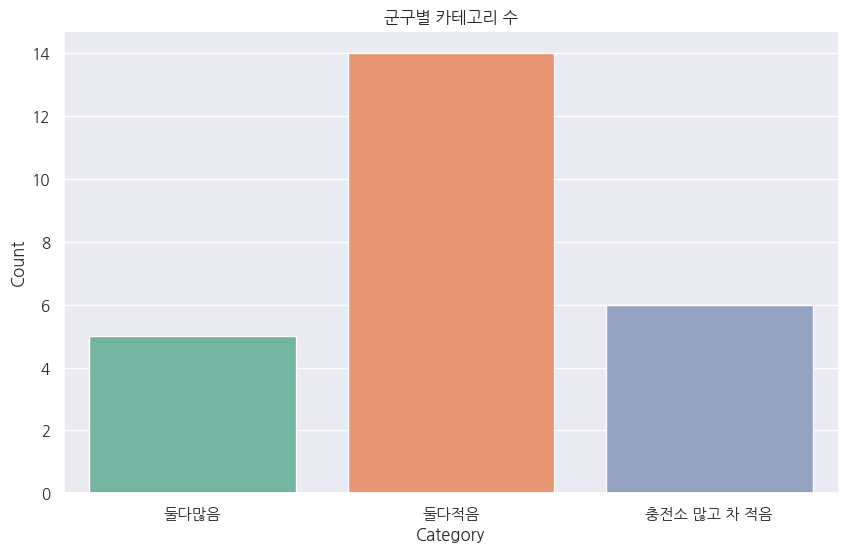

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 프레임 생성
visualization_data = pd.DataFrame({
    'Category': ['둘다많음', '둘다적음', '충전소 많고 차 적음'],
    'Count': [len(merge_res['둘다많음']), len(merge_res['둘다적음']), len(merge_res['충전소 많고 차 적음'])]
})

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=visualization_data, palette='Set2')
plt.title('군구별 카테고리 수')
plt.show()


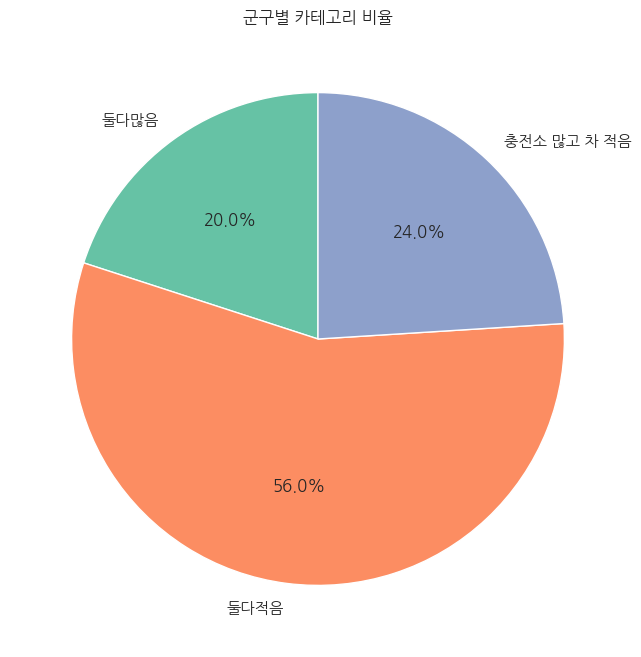

In [134]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 프레임 생성
visualization_data = pd.DataFrame({
    'Category': ['둘다많음', '둘다적음', '충전소 많고 차 적음'],
    'Count': [len(merge_res['둘다많음']), len(merge_res['둘다적음']), len(merge_res['충전소 많고 차 적음'])]
})

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(visualization_data['Count'], labels=visualization_data['Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('군구별 카테고리 비율')
plt.show()


상관관계: 0.7101151885339506


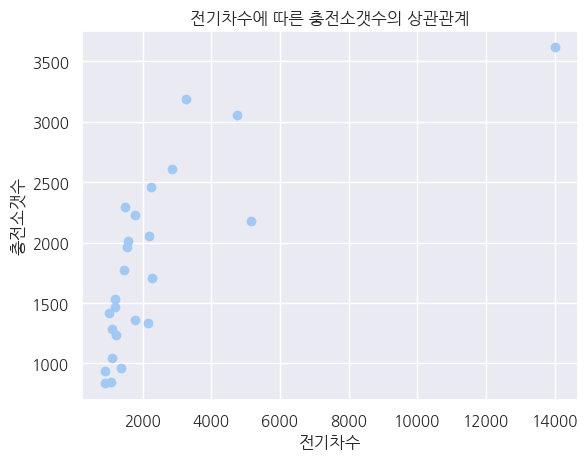

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame(SeoulData)

# '전기차수'에 따른 '충전소갯수'의 상관관계 계산
correlation = np.corrcoef(df['전기차수'], df['충전소갯수'])[0, 1]

print("상관관계:", correlation)

plt.scatter(df['전기차수'], df['충전소갯수'])
plt.title('전기차수에 따른 충전소갯수의 상관관계')
plt.xlabel('전기차수')
plt.ylabel('충전소갯수')
plt.show()


In [136]:
# 지도 시각화 
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [137]:
import folium
from folium import plugins 
# Create a base map
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))
# Add Choropleth layer
folium.Choropleth(
    geo_data=geo_path,
    data=SeoulData,
    columns=['군구', '비율'],
    key_on="feature.properties.name",
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="비율",
).add_to(map)

# Add markers for each '군구'
for _, row in SeoulData.iterrows():
    popup_html = f"<strong>군구:</strong> {row['군구']}<br>"
    popup_html += f"<strong>충전소 갯수:</strong> {row['충전소갯수']}<br>"
    popup_html += f"<strong>전기차 수:</strong> {row['전기차수']}"
    
    folium.Marker(location=[row['Y'], row['X']], popup=folium.Popup(html=popup_html, max_width=200)).add_to(map)


map


In [138]:
import folium
from folium.plugins import MarkerCluster

# Create a base map
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")

# Create MarkerCluster layer
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each '군구' to the MarkerCluster layer
for _, row in SeoulData.iterrows():
    popup_html = f"<strong>군구:</strong> {row['군구']}<br>"
    popup_html += f"<strong>충전소 갯수:</strong> {row['충전소갯수']}<br>"
    popup_html += f"<strong>전기차 수:</strong> {row['전기차수']}"

    folium.Marker(
        location=[row['Y'], row['X']],
        popup=folium.Popup(html=popup_html, max_width=200),
    ).add_to(marker_cluster)

# Display the map
map


In [139]:
import pandas as pd
import pymysql


conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 전기차_충전소_설치현황_위경도포함"

StationXY = pd.read_sql_query(sql,conn)
conn.close()
StationXY.head()


/tmp/ipykernel_4660/640207390.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  StationXY = pd.read_sql_query(sql,conn)


,시구,군구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종,위도,경도
0,서울특별시,강남구,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",0,0
1,서울특별시,강남구,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",0,0
2,서울특별시,강남구,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",37.4831474,127.0853694
3,서울특별시,강남구,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",37.5147838,127.0543618
4,서울특별시,강남구,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",37.4623303,127.1012352


In [140]:
StationXY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시구        608 non-null    object
 1   군구        608 non-null    object
 2   설치장소      608 non-null    object
 3   주소        608 non-null    object
 4   급속충전기(대)  608 non-null    object
 5   완속충전기(대)  608 non-null    object
 6   지원차종      608 non-null    object
 7   위도        608 non-null    object
 8   경도        608 non-null    object
dtypes: object(9)
memory usage: 42.9+ KB


In [141]:
StationXY['급속충전기(대)'] = StationXY['급속충전기(대)'].astype('float')
StationXY['완속충전기(대)'] = StationXY['완속충전기(대)'].astype('float')
StationXY['위도'] = StationXY['위도'].astype('float')
StationXY['경도'] = StationXY['경도'].astype('float')

In [142]:
import folium

# Create a base map
map = folium.Map(location=[37.5502, 126.982], zoom_start=12, tiles="OpenStreetMap")

# Add markers for each location in the dataset
for _, row in StationXY.iterrows():
    popup_html = f"<strong>설치장소:</strong> {row['설치장소']}<br>"
    popup_html += f"<strong>주소:</strong> {row['주소']}<br>"
    popup_html += f"<strong>급속충전기:</strong> {row['급속충전기(대)']} 대<br>"
    popup_html += f"<strong>완속충전기:</strong> {row['완속충전기(대)']} 대<br>"
    popup_html += f"<strong>지원차종:</strong> {row['지원차종']}"

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=folium.Popup(html=popup_html, max_width=300),
    ).add_to(map)

# Display the map
map


In [179]:
location_data = StationXY[['위도', '경도']].values[:len(StationXY)].tolist()

center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=10)

for i in range(len(StationXY)):
    if StationXY['급속충전기(대)'][i] > 0:
        station_color = 'royalblue'
    elif StationXY['완속충전기(대)'][i] > 0:
        station_color = 'indigo'

    popup_html = f"<strong>지원차종:</strong> {StationXY['지원차종'][i]}"

    folium.CircleMarker(
        location=location_data[i],
        radius=5,
        color=station_color,
        fill=True,
        popup=folium.Popup(html=popup_html, max_width=300),
    ).add_to(m)

plugins.MarkerCluster(location_data).add_to(m)
m


In [144]:
import pandas as pd
import pymysql


conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 서울시_자치구별_충전방해_민원건수"

SeoulDisturb = pd.read_sql_query(sql,conn)
conn.close()
SeoulDisturb.head()


/tmp/ipykernel_4660/1292643368.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SeoulDisturb = pd.read_sql_query(sql,conn)


,구별,충전방해건수
0,강남구,599
1,강동구,988
2,강북구,479
3,강서구,340
4,관악구,348


In [145]:
SeoulDisturb = SeoulDisturb.rename(columns={'구별':'군구'})

In [146]:
SeoulData = pd.merge(SeoulData, SeoulDisturb)
SeoulData = SeoulData[['군구', '충전소갯수', '전기차수', '비율', '충전방해건수', '충전소갯수_비교', '전기차수_비교', 'X', 'Y']]
SeoulData.head()

,군구,충전소갯수,전기차수,비율,충전방해건수,충전소갯수_비교,전기차수_비교,X,Y
0,강남구,3613.0,14026.0,3.88,599,많음,많음,127.062985,37.496644
1,강동구,1709.0,2271.0,1.33,988,적음,적음,127.147012,37.550450
2,강북구,835.0,890.0,1.07,479,적음,적음,127.011189,37.643474
3,강서구,2604.0,2867.0,1.10,340,많음,많음,126.822807,37.561235
4,관악구,963.0,1355.0,1.41,348,적음,적음,126.945337,37.467376


In [147]:
SeoulData[['군구', '충전소갯수', '전기차수', '비율', '충전방해건수']]

,군구,충전소갯수,전기차수,비율,충전방해건수
0,강남구,3613.0,14026.0,3.88,599
1,강동구,1709.0,2271.0,1.33,988
2,강북구,835.0,890.0,1.07,479
3,강서구,2604.0,2867.0,1.10,340
4,관악구,963.0,1355.0,1.41,348
5,광진구,851.0,1069.0,1.26,307
6,구로구,2177.0,5161.0,2.37,513
7,금천구,1414.0,1033.0,0.73,529
8,노원구,2012.0,1561.0,0.78,213
9,도봉구,1049.0,1093.0,1.04,106


In [148]:
SeoulData['충전방해건수'] = SeoulData['충전방해건수'].astype('float')
SeoulData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   군구        25 non-null     object 
 1   충전소갯수     25 non-null     float64
 2   전기차수      25 non-null     float64
 3   비율        25 non-null     float64
 4   충전방해건수    25 non-null     float64
 5   충전소갯수_비교  25 non-null     object 
 6   전기차수_비교   25 non-null     object 
 7   X         25 non-null     float64
 8   Y         25 non-null     float64
dtypes: float64(6), object(3)
memory usage: 1.9+ KB


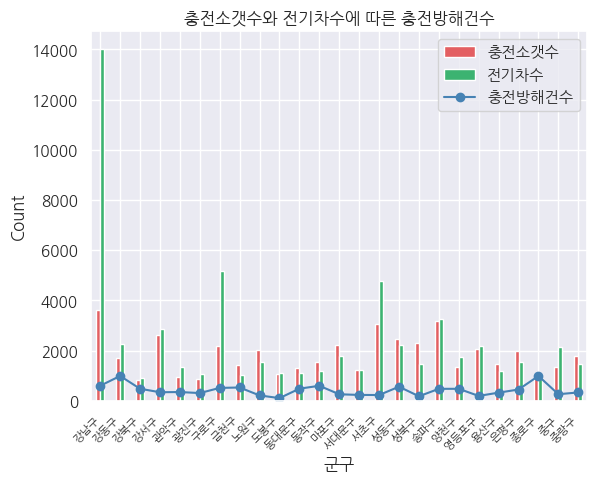

In [150]:
import matplotlib.pyplot as plt

df = pd.DataFrame(SeoulData)

fig, ax1 = plt.subplots()

df.plot(x='군구', y=['충전소갯수', '전기차수'], kind='bar', ax=ax1, rot=0, color=['#e35f62', 'mediumseagreen'], position=0.5, width=0.4)
df.plot(x='군구', y='충전방해건수', kind='line', ax=ax1, color='steelblue', marker='o')
ax1.set_ylabel('Count')
ax1.set_title('충전소갯수와 전기차수에 따른 충전방해건수')

ax1.set_xticklabels(df['군구'], rotation=45, ha='right', fontsize=8)
plt.show()


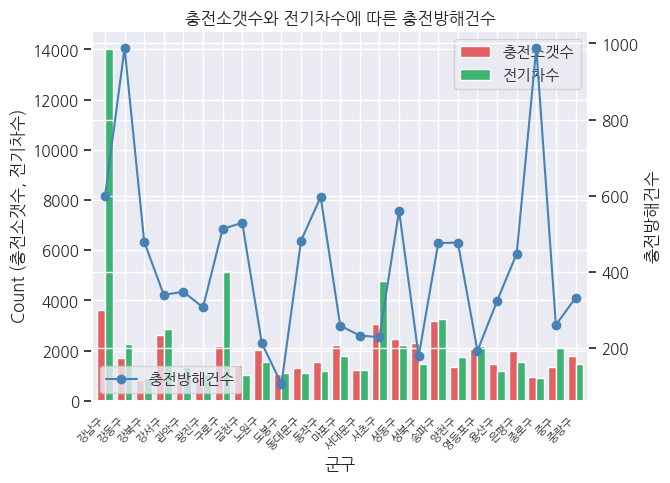

In [151]:
import matplotlib.pyplot as plt

# Assuming SeoulData is a DataFrame with the required columns
df = pd.DataFrame(SeoulData)

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot bar plots for '충전소갯수' and '전기차수'
df.plot(x='군구', y=['충전소갯수', '전기차수'], kind='bar', ax=ax1, rot=45, color=['#e35f62', 'mediumseagreen'], width=0.8)

# Create a second y-axis to plot the line plot for '충전방해건수'
ax2 = ax1.twinx()
df.plot(x='군구', y='충전방해건수', kind='line', ax=ax2, color='steelblue', marker='o')

# Set labels and title
ax1.set_ylabel('Count (충전소갯수, 전기차수)')
ax2.set_ylabel('충전방해건수')
ax1.set_title('충전소갯수와 전기차수에 따른 충전방해건수')

# Set x-axis labels
ax1.set_xticklabels(df['군구'], rotation=45, ha='right', fontsize=8)

# Show the plot
plt.show()


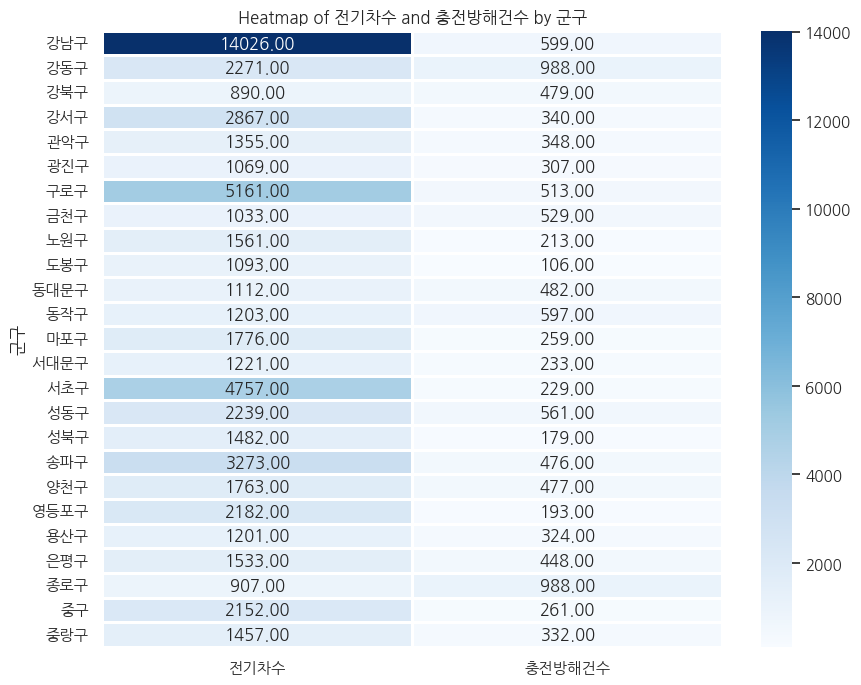

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming SeoulData is a DataFrame with the required columns
df = pd.DataFrame(SeoulData)

# Pivot the data to create a matrix for '군구' vs. '전기차수' and '충전방해건수'
heatmap_data = df.pivot_table(index='군구', values=['전기차수', '충전방해건수'], aggfunc='mean')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f', linewidths=1)

# Set the title
plt.title('Heatmap of 전기차수 and 충전방해건수 by 군구')

# Show the plot
plt.show()


2021년 기준 한국의 충전기 1대당 전기차 대수는 2.6대

2023년 말 기준 한국의 충전기 1대당 전기차 대수는 2.0대

정부는 2030년까지 전기차 1대당 충전기 3.4기를 확보한다는 목표